# Answer-01 : Logistic Regression/LDA

In [1]:
''' All necessary imports '''

import numpy as np
import pandas as pd
import math
import random
# from scipy import linalg
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

# Part-01 
Plot the dataset using different colors for the two classes. 

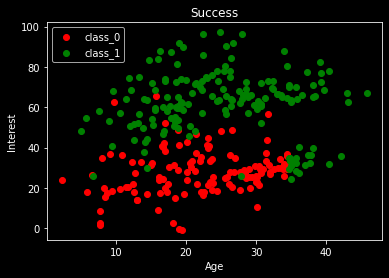

In [2]:
filename = 'classification.csv'

''' read data from file and return the dataframe '''
def read_data(filename):
    df = pd.read_csv(filename)
    # print(df)
    return df

success_0=[]
success_1 = []
age_0=[]
age_1=[]
interest_0=[]
interest_1=[]

''' function for plotting the dataset points '''
def plot_dataset(df):
    data = df.values.tolist()
    length_data = len(data)
    for row in data:
        if row[2] == 0.0:
            success_0.append((row[0],row[1]))
            age_0.append(row[0])
            interest_0.append(row[1])
        else:
            success_1.append((row[0],row[1]))
            age_1.append(row[0])
            interest_1.append(row[1]) 

    fig,ax = plt.subplots()
    plt.scatter(age_0,interest_0,c='red',label='class_0')
    plt.scatter(age_1,interest_1,c='green',label='class_1')
    legend = ax.legend()

    plt.xlabel("Age")
    plt.ylabel("Interest")
    plt.title("Success")

# read file 
df = read_data(filename)

# df.head(5)
# plot dataset
plot_dataset(df)



# Part-02
Implement the least square method for classification and plot the decision boundary. Clearly describe your results. Is the decision boundary able to classify the points correctly

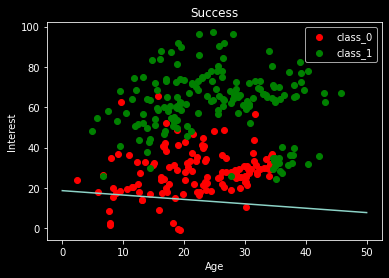

In [3]:
''' function for preprocessing the data to convert the dataframe of NXM into
    feature matrix X of NX(M-1) and label Y.'''
def pre_process_data(dataframe):
    data = []
    for col in dataframe:
       data.append(np.array(dataframe[col]))
    # print(data[0].shape)
    for i,d in enumerate(data):
        data[i].shape = (data[i].shape[0],1)
    data = np.concatenate(data, axis = 1)
    # print("data", data)
    X = data[:,:-1]
    Y = data[:,-1]
    # Y.shape = (Y.shape[0],1)
    return X,Y


''' function for adding the bias column to feature matrix '''
def add_bias_column(X):
    M = X.shape[0]
    N = X.shape[1]
    bias_X = np.ones((M,N+1))
    # print("bias_X shape",bias_X.shape)
    bias_X[:,1:] = X
    # bias_X[:,:-1] = X
    # print("bias_X = ",bias_X)
    return bias_X

''' evaluate beta for least square method '''
def evaluate_beta(X,Y):
    return np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.dot(np.transpose(X),Y))

''' reading data from file '''
dataframe = read_data('classification.csv')

''' preprocessing the dataframe to convert into feature vector as X and label as Y. '''
X,Y = pre_process_data(dataframe)

''' adding bias column '''
bias_X = add_bias_column(X)

beta = evaluate_beta(bias_X,Y)

line_x = np.linspace(0, 50)
line_y = -beta[0] / beta[2] - (beta[1] / beta[2]) * line_x
# line_y =  ((-beta[0]) / beta[1]) * line_x
fig,ax = plt.subplots()
plt.scatter(age_0,interest_0,c='red',label='class_0')
plt.scatter(age_1,interest_1,c='green',label='class_1')
legend = ax.legend()

plt.xlabel("Age")
plt.ylabel("Interest")
plt.title("Success")
plt.plot(line_x,line_y)

# plt.plot([min(bias_X), max(bias_X)], line_y, color = 'blue')


# Results & Observations :

* The decision boundary which is plotted using least square method is not able to classify points correctly. That error function is biased towards one set of class points (this may be because of label 0 when multiplying in error function not producing any impact).
*  It can be inferred from data points that the decision boundary has some higher polynomial degree character and not linearly seperable therefore least square method is not suitable here.

# Part-03 & 04: 
Implement the logistic regression using gradient descent method. Choose the initial values of w in the range [−0.1, 0.1]. Plot a 3D figure depicting the sigmoid function obtained along with the same color coding of the points. Did the performance improved as compared to previous question?

Plot the decision boundary obtained for logistic regression.

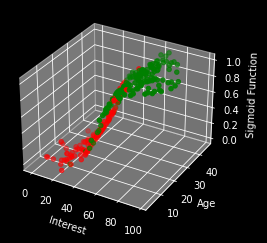

In [4]:
from matplotlib.colors import ListedColormap
''' Logistic Regression '''


''' function which return the sigmoid of the minimized function g((beta).T.X)) 
    for binary classification. '''
def g_sigmoid(inp):
    return (1/(1+np.exp(-inp)))

''' calculate loglikelihood beta function '''
def loglikelihood_cost(inp, actual):
    return (actual*np.log(inp)) + ((1-actual)*(np.log(1-inp)))

''' calculate the step_diff as previous beta - curr beta '''
def step_diff(prev,curr):
    return abs(prev-curr)


''' Logistic Regressor Class '''
class LogisticRegressor():
    def __init__(self, learning_rate=0.03):
        # store learning rate and weights
        self.learning_rate = learning_rate
        self.weights = None
        self.sigmoid_values = 0
    ''' fitting model '''
    def fit(self, X, Y):
        ''' get the shape of training feature data '''
        m,n = X.shape

        ''' add bias cloumn to feature data matrix '''
        bias_X = add_bias_column(X)
        ''' initialize the values of beta (weight w) parameters in the range [-0.1, 0.1 ] as per the question.  '''
        # coeff_vals = np.zeros(n+1)
        coeff_vals = np.array([random.uniform(-0.1, 0.1) for _ in range(n+1)])
        '''previous loglikelihood_cost '''
        prev_jbeta = None
        ''' evaluate loss '''
        h_beta = g_sigmoid(np.dot(bias_X, coeff_vals))
        loss = (h_beta - Y)
        ''' evaluate the current loglikelihood_cost '''
        curr_jbeta = np.sum(loglikelihood_cost(h_beta, Y)) * (-1/m)
        ''' set the difference between consecutive error is less than 0.0000001 for convergence. '''
        count = 0
        while (prev_jbeta is None or step_diff(prev_jbeta,curr_jbeta) > 0.0000001 ):
            ''' applying gradient descent technique for finding the descent values.  ''' 
            descent_vals = (np.dot(bias_X.transpose(), loss) * self.learning_rate) / m
            ''' update the beta coefficients with descent values calculated by gradient descent technique. '''
            coeff_vals -= descent_vals
            prev_jbeta = curr_jbeta
            ''' calculate new loglikelihood_cost '''
            h_beta = g_sigmoid(np.dot(bias_X, coeff_vals))
            
            loss = (h_beta - Y)
            curr_jbeta = np.sum(loglikelihood_cost(h_beta, Y)) * (-1/m)
            count+=1
            print(f"Difference between consecutive costs: {abs(prev_jbeta - curr_jbeta)}\t", end="\r", flush=True)
        
        # print('count = ',count)
        self.sigmoid_values = h_beta
        self.weights = coeff_vals

    ''' function for predicting results. '''
    def predict(self, data_feature):
        m,n = data_feature.shape
        ''' add bias column to feature data '''
        bias_X = add_bias_column(data_feature)
        h_theta = g_sigmoid(np.dot(bias_X, self.weights))
        ''' set threshold value to 0.5 '''
        h_theta[h_theta>=0.5] = 1
        h_theta[h_theta<0.5] = 0
        return h_theta



train_data = pd.read_csv(filename)

''' standardize the features '''
for column in train_data:
    if(column != 'success'):
        train_data[column] = (train_data[column] - train_data[column].mean()) / train_data[column].std()

train_data_feature,train_data_label = pre_process_data(train_data)

model = LogisticRegressor()

model.fit(train_data_feature,train_data_label)

sig = model.sigmoid_values

# print('sig', sig)

ax = plt.axes(projection='3d')
ax.scatter(df['interest'],df['age'],sig,c=np.where(df['success']==1.0,'g','r'))
ax.set_xlabel('Interest')
ax.set_ylabel('Age')
ax.set_zlabel('Sigmoid Function')
plt.show()


# 

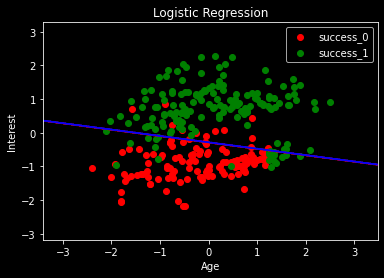

In [5]:
X_set, y_set = train_data_feature,train_data_label
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contour(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')) )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
# print("x size",X_set.shape)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],

                c = np.array(['red','green'])[i],label = 'success_0' if j == 0 else 'success_1')
                # c = ListedColormap(('red', 'green'))(i), label = j)


plt.title('Logistic Regression')
plt.xlabel('Age')
plt.ylabel('Interest')
plt.legend()
plt.show()


# Results & Observations :

* There is a significant improvement in performance using logisitic regression as compared to least square method (part02).
* Logisitic regression has a better logarithmic loss function as opposed to least squares regression.

# Part 05 
Find the linear discriminant boundary and describe your results

In [6]:
''' Linear Discriminant Analysis class '''
class LDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None
    ''' fitting model '''
    def fit(self, X, y):
        m,n = X.shape   
        class_labels = np.unique(data_label) 
        ''' mean of data feature matrix '''
        data_feature_mean = np.mean(data_feature,axis = 0)
        ''' with in class scatter matrix '''
        scatter_w = np.zeros((n,n))
        ''' between class scatter matrix '''
        scatter_b = np.zeros((n,n))
        ''' calculation of within class scatter matrix for each class label 
            using formula scatter_w = sum((data_feature_c - data_feature_c_mean)^2 )) '''
        ''' calculation of Between class scatter for each class label 
            using formula scatter_b = sum( n_c * (data_feature_c_mean - data_feature_mean)^2 )) '''
        for c_l in class_labels:
            data_feature_c = data_feature[data_label == c_l ]
            ''' finding class mean '''
            data_feature_c_mean = np.mean(data_feature_c,axis = 0 )

            scatter_w += (data_feature_c - data_feature_c_mean).T.dot((data_feature_c - data_feature_c_mean))
            n_c = data_feature_c.shape[0]
            mean_diff = (data_feature_c_mean - data_feature_mean).reshape(n,1)

            scatter_b += n_c * (mean_diff).dot(mean_diff.T) 

        ''' calculate W = scatter_w^-1 * scatter_b'''
        W = np.linalg.inv(scatter_w).dot(scatter_b)

        ''' generating eigenvalues and eigenvectors corresponding to w ''' 
        eigen_values, eigen_vectors = np.linalg.eig(W)
        ''' transpose eigen vector and sort eigen values from high to low for easier calculation '''
        eigen_vectors = eigen_vectors.T
        ''' returns the indices one would use to sort the array. '''
        idxs = np.argsort(abs(eigen_values))[::-1]
        eigen_values = eigen_values[idxs]
        eigen_vectors = eigen_vectors[idxs]
        ''' save initial n eigenvectors '''
        self.linear_discriminants = eigen_vectors[0 : self.n_components]
    ''' function to transform ''' 
    def transform(self, data_feature):
        ''' return projecting data'''
        return np.dot(data_feature, self.linear_discriminants.T)

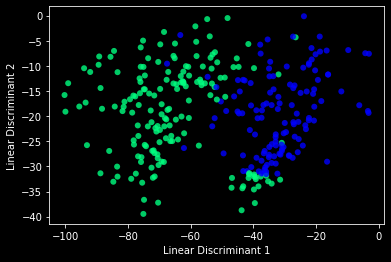

In [7]:
dff = pd.read_csv('classification.csv')
''' pre_processing the dataframe and convert them to feature matrix and data label'''
data_feature,data_label = pre_process_data(dff)
''' creating lda model object '''
lda = LDA(2)
''' training model entire fature matirx '''
lda.fit(data_feature, data_label)
''' proejection of feature matrix '''
data_feature_projected = lda.transform(data_feature)
x1, x2 = data_feature_projected[:, 0], data_feature_projected[:, 1] 

''' plotting projection points or lda decision boundary  '''
plt.scatter(
    x1, x2, c=data_label, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("winter", 2)
)
plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.show()

# Results & Observations :

* It can be inferred from the above plot that data points belongs to different classification labels are more significantly seperable as compared to earlier in higher dimension.As converting the higher dimensional data points to lower dimensional data points to overcome curse of dimensionality. 

# Part-06 & 07 : 

Logistic regression considers only linear decision boundaries. One way to go from linear decision boundaries to non-linear decision boundaries is by considering polynomial curve of higher degree. For example, if input attributes are x1, x2 then transforming it into 2 degree polynomial will give features: {x1, x2, x1^2, x2^2, x1x2, 1}.
Identify an appropriate degree of the transformation that results in the optimal performance via logistic regression. Clearly explain your choice.

Plot the non linear decision boundary along with the dataset points



In [8]:

''' transforming features to higher degrees '''
def feature_mapping(X1, X2, degree):
    res = np.ones(X1.shape[0])
    # i = 1
    # while i < degree+1:
    #     j = 0
    #     while j < i+1:
    #         res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j)))
    #         j += 1
    #     i += 1
        
    for i in range(1,degree + 1):
        for j in range(0,i + 1):
            res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j)))
    return res

''' plot decision boundary for higher degrees '''
def plot_decision_boundary(theta,degree, axes):
    
    p = np.linspace(-3, 3, 50)
    q = np.linspace(-3, 3, 50)

    length_p = len(p)
    length_q = len(q)
    P,V = np.meshgrid(p,q)
    ''' converting P and V to vectors for calculating additional features
       using vectorized implementation '''
    ''' flatteing the vectors '''
    P = np.ravel(P)
    V = np.ravel(V)
    R = np.zeros((length_p * length_q))
    ''' feature mapping '''
    X_poly = feature_mapping(P, V, degree)
    X_poly = np.hstack((np.ones((X_poly.shape[0],1)),X_poly))
    R = X_poly.dot(theta)
    ''' reshaping P, V, R back to matrix ''' 
    P = P.reshape((length_p, length_q))
    V = V.reshape((length_p, length_q))
    R = R.reshape((length_p, length_q))
    print('degree = ',degree)
    c_s = axes.contour(P,V,R,levels=[0],cmap= "winter")
    axes.legend(labels=['class 1', 'class 0', 'Decision Boundary',degree])
    return c_s

# degree_list = [2,3,4,5,6,7,8,9]
# for d in degree_list:
# degree = 2
model = LogisticRegressor()

''' function for non linear decision boundary using polynomial curve of higher degree '''
def ploy_curve_fitting(train_data_feature,d):
    X = feature_mapping(train_data_feature[:,0], train_data_feature[:,1], d)
    
    model.fit(X,train_data_label)
    
    m = train_data_feature.shape[0]
    x1 = train_data_feature[:,0].reshape((m, 1))
    x2 = train_data_feature[:,1].reshape((m, 1))
    y = train_data_label.reshape((m, 1))
    fig, axes = plt.subplots()
    axes.set_xlabel('Age')
    axes.set_ylabel('Interest')
    plt.scatter(x1[x1==x1-y],x2[x2==x2-y],c='red',label='class 0')
    plt.scatter(x1[x1!=x1-y],x2[x2!=x2-y],c='green',label='class 1')
    plot_decision_boundary(model.weights, d, axes)

degree =  2between consecutive costs: 9.9978062190198e-08	07	


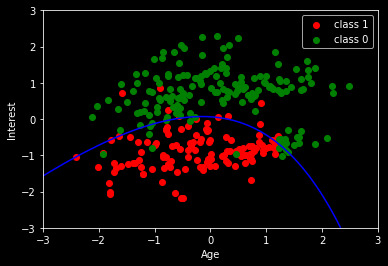

In [9]:
degree = 2
ploy_curve_fitting(train_data_feature,degree)

degree =  3between consecutive costs: 9.999903533008947e-08		


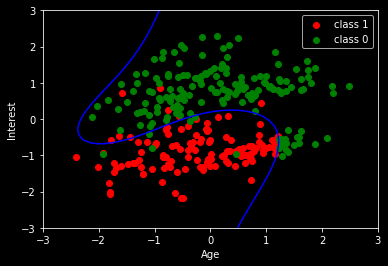

In [10]:
degree = 3
ploy_curve_fitting(train_data_feature,degree)

degree =  4between consecutive costs: nan	9109774612499e-06		


C:\Users\91965\AppData\Local\Temp\ipykernel_199436\1727218237.py:12: RuntimeWarning: divide by zero encountered in log
  return (actual*np.log(inp)) + ((1-actual)*(np.log(1-inp)))
C:\Users\91965\AppData\Local\Temp\ipykernel_199436\1727218237.py:12: RuntimeWarning: invalid value encountered in multiply
  return (actual*np.log(inp)) + ((1-actual)*(np.log(1-inp)))


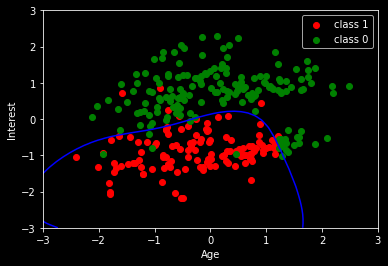

In [11]:
degree = 4
ploy_curve_fitting(train_data_feature,degree)

degree =  5between consecutive costs: nan	030710591636268214	


C:\Users\91965\AppData\Local\Temp\ipykernel_199436\1727218237.py:12: RuntimeWarning: divide by zero encountered in log
  return (actual*np.log(inp)) + ((1-actual)*(np.log(1-inp)))
C:\Users\91965\AppData\Local\Temp\ipykernel_199436\1727218237.py:12: RuntimeWarning: invalid value encountered in multiply
  return (actual*np.log(inp)) + ((1-actual)*(np.log(1-inp)))


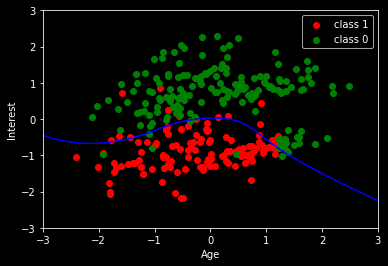

In [12]:
degree = 5
ploy_curve_fitting(train_data_feature,degree)

degree =  6between consecutive costs: nan	1767797507881308		


C:\Users\91965\AppData\Local\Temp\ipykernel_199436\1727218237.py:12: RuntimeWarning: divide by zero encountered in log
  return (actual*np.log(inp)) + ((1-actual)*(np.log(1-inp)))
C:\Users\91965\AppData\Local\Temp\ipykernel_199436\1727218237.py:12: RuntimeWarning: invalid value encountered in multiply
  return (actual*np.log(inp)) + ((1-actual)*(np.log(1-inp)))


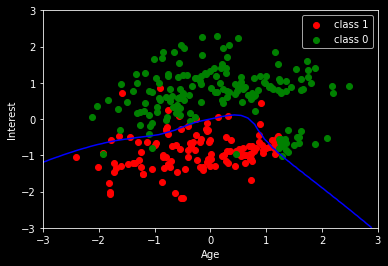

In [13]:
degree = 6
ploy_curve_fitting(train_data_feature,degree)

Difference between consecutive costs: nan	

C:\Users\91965\AppData\Local\Temp\ipykernel_199436\1727218237.py:12: RuntimeWarning: divide by zero encountered in log
  return (actual*np.log(inp)) + ((1-actual)*(np.log(1-inp)))
C:\Users\91965\AppData\Local\Temp\ipykernel_199436\1727218237.py:12: RuntimeWarning: invalid value encountered in multiply
  return (actual*np.log(inp)) + ((1-actual)*(np.log(1-inp)))


degree =  7


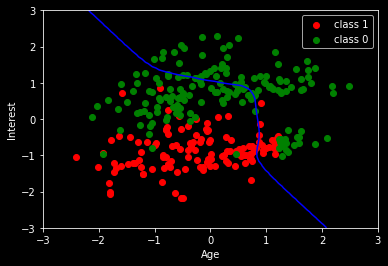

In [14]:
degree = 7
ploy_curve_fitting(train_data_feature,degree)

# Result & Observeations : 

* It can be inferred from above plots that decision boundary for degree = 2,3,4,5 classifies better than from degree = 1 but decision boundaries for degree = 6,7 are overfitting the data points via logistic regression.  

* Complex polynomial of higher degree are overfitting the data points and hence for testing points it will more biased.



# Answer-02 :  PCA / Decision Trees/ Random Forests

In [15]:
''' All necessary imports '''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [16]:
''' reading data from file and storing into dataframe '''
df = pd.read_csv('adult.csv')
print(df.shape)
df.head()

(48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


DataFrame Cleaning Process

Step01: Checking null values in dataframe

In [18]:
''' checking the null values in dataframe '''
df[df.isnull()].sum()

age                0.0
workclass            0
fnlwgt             0.0
education            0
educational-num    0.0
marital-status       0
occupation           0
relationship         0
race                 0
gender               0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country       0
income               0
dtype: object

Observation: No Null values present in dataframe

Step02: Checking for '?' in dataframe

In [19]:
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

Observation: '?' values found in workclass,occupation,and native-country columns 

Step03: Replacing '?' to Nan ( Not a number ) values

In [20]:
df['workclass']=df['workclass'].replace('?',np.nan)
df['occupation']=df['occupation'].replace('?',np.nan)
df['native-country']=df['native-country'].replace('?',np.nan)

Step04: Checking Null Values

In [21]:
df.isnull().head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False


In [22]:
''' No '?' values are there, all replaced with nan not a number '''

df.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Step05: Removing all Nan values from Dataframe

In [23]:
df.dropna(how='any',inplace=True)
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


In [24]:
df.shape

(45222, 15)

Step06: Checking Duplictaes

In [25]:
df.duplicated().sum()

47

Step07: Removing Duplicates

In [26]:
df.drop_duplicates()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [27]:
df. describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [28]:
''' updating all catagorical values to numeric values '''

max_unique_values = 0
max_col_name = None
for col in df:
    # print( df[col].info() )
    # print(col,  '--->>>' ,df[col].dtype)

    if( df[col].dtype != 'int64'):
        unique_values = np.unique(df[col])
        if( max_unique_values < len(unique_values)):
            max_unique_values = len(unique_values)
            max_col_name = col
        r = 0
        for val in unique_values:
            df.loc[df[col] == val, col] = r
            r += 1
            
print('maximum unique values in column ',max_unique_values)
print('maximum catagorical unique values column ',max_col_name)
df.head()
# print(df.shape)

maximum unique values in column  41
maximum catagorical unique values column  native-country


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0


# Part01 : 
Implement the decision tree algorithm to classify whether the income of a particular user exceeds $50K per year or not.Divide the data into two sets: Training set (80%) and validation set (20%). Plot the training error and validation error against the number of nodes present in the decision tree. Describe the optimal decision tree in your video.

In [29]:
# df.info()

''' function for normalize the dataframe except target column '''
def normalize_dataframe(df):
	for column in df:
		if(column != 'income'):
			df[column] = (df[column] - df[column].mean()) / df[column].std()
	return df

''' divide the dataframe into train and test dataframes '''
def self_train_and_test_split(df,fraction):
	train_df = df.sample(frac = fraction)
	test_df = df.drop(train_df.index)
	return train_df,test_df

# ''' normalize the dataframe except target column '''
# for column in df:
#     if(column != 'income'):
#         df[column] = (df[column] - df[column].mean()) / df[column].std()

normalized_df = normalize_dataframe(df)


''' divide the dataframe into train and test dataframes '''
train_df,test_df = self_train_and_test_split(normalized_df,0.8)
# train_df = df.sample(frac = 0.8)
# test_df = df.drop(train_df.index)

# # features = train_df.columnss
train_df.head()
test_df.head()

# names = list(df.keys())

# print(train_df.shape)
# print(test_df.shape)
# df.keys()




,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
5,-0.344075,-0.213441,0.084801,-2.701935,-1.613260,0.942926,0.255918,-0.258384,0.384106,0.693806,-0.146732,-0.218778,-0.910931,0.262996,0
21,-0.344075,-0.213441,0.462454,1.227839,-0.046402,0.942926,0.255918,0.993787,-2.018722,-1.441294,-0.146732,-0.218778,-0.494525,0.262996,0
36,-0.192765,-1.257149,2.025255,-0.34407,1.128740,-0.390001,0.75264,-0.884469,0.384106,0.693806,-0.146732,-0.218778,-0.078119,0.262996,1
39,-1.403247,-0.213441,0.641564,0.1799,-0.438117,0.942926,-0.985886,0.993787,0.384106,0.693806,-0.146732,-0.218778,-0.078119,0.262996,0
44,-1.403247,2.917685,-0.486219,1.227839,-0.046402,0.942926,-0.489165,0.993787,0.384106,0.693806,-0.146732,-0.218778,-0.744369,0.262996,0


# Decision Tree 

In [30]:

''' Decision Tree Classifier class '''
class SelfDecisionTreeClassifier():

    def __init__(self, minimum_split=10):
        ''' to decide where to stop with minimum number of data records '''
        self.minimum_split = minimum_split
        ''' default class that repeates maximum number of times '''
        self.default_class = None
        ''' store split points in tree '''
        self.tree = None

        

    ''' function for calculate entropy '''
    @staticmethod
    def entropy(split_location):
        ''' get unique entry values and their frequencies '''
        entries, nums = np.unique(split_location, return_counts = True)
        total = np.sum(nums)
        ''' evaluate entropy with log2 formula for each of the separate entry '''
        return np.sum([((-nums[i])/total)*np.log2(nums[i]/total) for i in range(len(entries))])

    ''' function for evaluating information gain '''
    def information_gain(self, data, split_at, end_index=14):
        ''' for a particular column getting the values and counts of unique different values'''
        vals, nums = np.unique(data[:,split_at], return_counts=True)
        ''' total sum of number of different values '''
        total_n = np.sum(nums)
        ''' calculate split entropy using weighted method with above entropy function'''
        split_entropy = np.sum([(nums[i]/total_n)*self.entropy(data[np.where(data[:,split_at]==vals[i])][:,end_index]) for i in range(len(vals))])
        
        ''' getting information gain by subtracting weighted entropy after split from current entropy '''
        return self.entropy(data[:,end_index]) - split_entropy

    def recursivly_fit(self, data, end_index = 14, last_split=-1):
        ''' only one class present inside current subtree '''
        if len(np.unique(data[:,end_index])) < 2:
            return np.unique(data[:,end_index])[0]
        # if less than minimum split members threshold
        elif len(data) < self.minimum_split:
            return np.argmax(np.bincount(data[:,end_index]))
        else:
            max_gain = -1e10
            split_at = None
            # end_col_index = self.end_col_index
            # calculate index at which split will give max info gain
            for val in range(end_index):
                if val != last_split:
                    information_gain = self.information_gain(data, val,end_index)
                    if  information_gain > max_gain:
                        max_gain = information_gain 
                        split_at = val
            

            ''' returning maximum frequency class if split as chosen index will give only a single vunique value '''
            if len(np.unique(data[:,split_at])) == 1:
                return np.argmax(np.bincount(data[:,end_index]))
            # creating a subtree
            root = {'key': split_at}
            for diff_attr in np.unique(data[:,split_at]):
                # add subtrees to the current root with each split value
                root[diff_attr] = self.recursivly_fit(data[np.where(data[:,split_at]==diff_attr)],end_index, last_split=split_at)
            return root

    def fit(self, train_data_feature, train_data_label, end_index=14):
        # concatenate labels to feature set to easier access with index
        data = np.c_[train_data_feature, train_data_label]
        # calculate default class which is class with maximum frequency
        self.default_class = np.argmax(np.bincount(data[:,end_index]))
        # recursively create tree
        self.tree = self.recursivly_fit(data,end_index)

    def recursive_predict(self, row, tree):
        # recursively find the class current row would belong to.
        try:
            val = tree[row[tree['key']]]
            # if the value obtained is a tree
            if isinstance(val, dict) == True:
                return self.recursive_predict(row, val)
            # if value obtained is a class
            else:
                return val
        # in case none of the key or index matches
        except (KeyError, IndexError) as _:
            return self.default_class

    ''' function for predicting results '''
    def predict(self, data_feature):
        # create an numpy array with each of the decision tree prediction
        return np.array([self.recursive_predict(data, self.tree) for data in data_feature])

    # # method required for working with sklearn cross validate
    # def get_params(self, deep = False):
    #     return {'minimum_split':self.minimum_split}


In [31]:
''' function for preprocessing the data to convert the dataframe of NXM into
    feature matrix X of NX(M-1) and label Y.'''
def pre_process_data(dataframe):
    data = []
    for col in dataframe:
       data.append(np.array(dataframe[col]))
    # print(data[0].shape)
    for i,d in enumerate(data):
        
        data[i].shape = (data[i].shape[0],1)
    data = np.concatenate(data, axis = 1)
    # print("data", data)
    X = data[:,:-1]
    Y = data[:,-1]
    # Y.shape = (Y.shape[0],1)
    return X,Y


count = []
''' function which recursivly find the number of nodes in decision tree.'''
def count_nodes_in_decision_tree(d):

    if(bool(d)):
        for key, value in d.items():
        # print('\t' * indent + str(key))
            if isinstance(value, dict):
                count.append(1)
                count_nodes_in_decision_tree(value)

    # print('count',len(count))

    # else:
    #   # print('\t' * (indent+1) + str(value))
    #   pass    

''' function for visualizing the tree '''
def print_tree(d,indent = 0):
  for key, value in d.items():
    print('\t' * indent + str(key))
    if isinstance(value, dict):
        count.append(1)
        print(value)
    else:
      print('\t' * (indent+1) + str(value))
       
''' various minimum split sizes for obtaining the optimal decision tree classifier '''
split_sizes = [2,3,4,5,7,10,15,20,40,50,100,500,700,1000,5000,10000]

''' function implementation for decision tree '''
def decision_tree(train_df,test_df):
    ''' train data label '''
    train_data_label = np.array(train_df['income'],dtype='int64')
    ''' train data feature '''
    train_data_feature = np.array(train_df.loc[:, train_df.columns != 'income'],dtype='int64')
    ''' test data label '''
    test_data_label = np.array(test_df['income'],dtype='int64')
    ''' test data feature '''
    test_data_feature = np.array(test_df.loc[:, test_df.columns != 'income'],dtype='int64')
    ''' minimum split sizes '''
    
    training_error = []
    validation_error = []
    training_accuracy = []
    testing_accuracy = []
    node_count = []
    # count = []

    ''' Implement the decision tree on different minimum split sizes '''
    for s in split_sizes:
        global count
        count = []
        ''' Create an Decision tree classifier object '''
        dtc = SelfDecisionTreeClassifier(s)
        ''' fit the training feature data to decision tree'''
        dtc.fit(train_data_feature,train_data_label)
        # print('len',len(dtc.tree))
        ''' predict for train data feature '''
        y_train_pred = dtc.predict(train_data_feature)
        ''' predict for test data feature '''
        y_test_pred = dtc.predict(test_data_feature)
        # print('accuracy', np.sum(test_data_label == y_test_pred) / len(test_data_label))
        ''' count the number of nodes in tree '''
        count_nodes_in_decision_tree(dtc.tree)
        node_count.append(len(count))
        ''' evaluate training accuracy '''
        rms_train_acc = np.sum(train_data_label == y_train_pred) / len(train_data_label)
        training_accuracy.append(rms_train_acc)
        ''' evaluate testing accuracy '''
        rms_test_acc = np.sum(test_data_label == y_test_pred) / len(test_data_label)
        testing_accuracy.append(rms_test_acc)
        ''' evaluate training error '''
        rms_train_err = np.square(np.subtract(train_data_label,y_train_pred)).mean()
        training_error.append(rms_train_err)
        ''' evaluate testing error '''
        rms_test_err = np.square(np.subtract(test_data_label,y_test_pred)).mean()
        validation_error.append(rms_test_err)
    

    return training_error,validation_error,training_accuracy,testing_accuracy,node_count

training_error,validation_error,training_accuracy,testing_accuracy,node_count = decision_tree(train_df,test_df)
# ''' train data label '''
# train_data_label = np.array(train_df['income'],dtype='int64')
# ''' train data feature '''
# train_data_feature = np.array(train_df.loc[:, train_df.columns != 'income'],dtype='int64')
# ''' test data label '''
# test_data_label = np.array(test_df['income'],dtype='int64')
# ''' test data feature '''
# test_data_feature = np.array(test_df.loc[:, test_df.columns != 'income'],dtype='int64')
# ''' minimum split sizes '''




# training_error = []
# testing_error = []
# training_accuracy = []
# testing_accuracy = []
# node_count = []

# ''' Implement the decision tree on different minimum split sizes '''
# for s in split_sizes:
#     count = []
#     ''' Create an Decision tree classifier object '''
#     dtc = SelfDecisionTreeClassifier(s)
#     ''' fit the training feature data to decision tree'''
#     dtc.fit(train_data_feature,train_data_label)
#     # print('len',len(dtc.tree))
#     ''' predict for train data feature '''
#     y_train_pred = dtc.predict(train_data_feature)
#     ''' predict for test data feature '''
#     y_test_pred = dtc.predict(test_data_feature)
#     # print('accuracy', np.sum(test_data_label == y_test_pred) / len(test_data_label))


#     ''' count the number of nodes in tree '''
#     count_nodes_in_decision_tree(dtc.tree)
#     node_count.append(len(count))
#     ''' evaluate training accuracy '''
#     rms_train_acc = np.sum(train_data_label == y_train_pred) / len(train_data_label)
#     training_accuracy.append(rms_train_acc)
#     ''' evaluate testing accuracy '''
#     rms_test_acc = np.sum(test_data_label == y_test_pred) / len(test_data_label)
#     testing_accuracy.append(rms_test_acc)
#     ''' evaluate training error '''
#     rms_train_err = np.square(np.subtract(train_data_label,y_train_pred)).mean()
#     training_error.append(rms_train_err)
#     ''' evaluate testing error '''
#     rms_test_err = np.square(np.subtract(test_data_label,y_test_pred)).mean()
#     testing_error.append(rms_test_err)
    



# min_training_error = min(training_error)
# min_testing_error = min(validation_error)

# max_training_accuracy = max(training_accuracy)
# max_testing_accuracy = max(testing_accuracy)

# min_training_error_index = training_error.index(min_training_error)
# min_testing_error_index = validation_error.index(min_testing_error)

# max_training_accuracy_index = training_accuracy.index(max_training_accuracy)
# max_testing_accuracy_index = testing_accuracy.index(max_testing_accuracy)

# print('min_training_error_index = ',min_training_error_index," min_training_error = ",min_training_error)
# print('min_testing_error_index = ',min_testing_error_index, ' min_testing_error = ',min_testing_error)
# print('max_training_accuracy_index = ',max_training_accuracy_index," min_training_accuracy = ",max_training_accuracy)
# print('max_testing_accuracy_index = ',max_testing_accuracy_index, ' min_testing_accuracy = ',max_testing_accuracy)



# print(min(training_error))
print('testing accuracy = ',testing_accuracy)
print('validation/testing error = ',validation_error)
print('node_count = ',node_count)

# pretty(d)


testing accuracy =  [0.806390977443609, 0.8079389650597081, 0.807828394515701, 0.8082706766917294, 0.8097080937638214, 0.8112560813799203, 0.8134674922600619, 0.8146837682441398, 0.8163423264042459, 0.8168951791242813, 0.8162317558602389, 0.8189960194604158, 0.818000884564352, 0.8159000442282176, 0.7967713401149934, 0.75718708536046]
validation/testing error =  [0.19360902255639098, 0.19206103494029192, 0.19217160548429899, 0.19172932330827067, 0.19029190623617867, 0.1887439186200796, 0.18653250773993807, 0.18531623175586023, 0.18365767359575408, 0.18310482087571872, 0.18376824413976117, 0.18100398053958425, 0.18199911543564795, 0.1840999557717824, 0.20322865988500663, 0.24281291463954002]
node_count =  [2455, 2317, 2151, 2025, 1781, 1542, 1250, 1048, 698, 616, 394, 117, 82, 56, 11, 3]


# Ressults & Observation:
* From the above testing accuracy for different minimum sample split sizes it can be clearly seen 
that lower sample splt sizes has better accuracy or lower validation error as compared to large split sizes but number of nodes are more as compared to large split sizes.  

* From the above testing accuracy it can be seen that for lower split sizes the accuracy is approx 0.80 which increased a littile for split size = 7,10,15 but again drops further for higher split sizes.

* Hence Optimal decision tree classifier can be obtained for split sizes 7,10 as both training and testing error are minimzed as compared to others. Split size = 10 will be selected as a optimal decision tree classifier for part 03. 

* Print tree function is implemented for visulazation. Tree is entirly grow for particular split size threshold and stored in nested dictionary. 

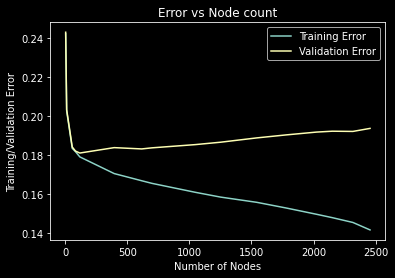

In [32]:
from matplotlib import style
style.use('dark_background')

# node_count.reverse()
# training_error.reverse()
# testing_error.reverse()

plt.plot(node_count,training_error,label = 'Training Error')
plt.plot(node_count,validation_error,label = 'Validation Error')
plt.legend()
plt.xlabel("Number of Nodes")
plt.ylabel("Training/Validation Error")
plt.title('Error vs Node count')
plt.show()

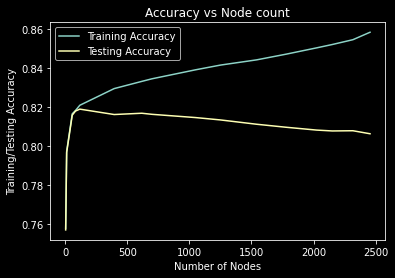

In [33]:
plt.plot(node_count,training_accuracy,label = 'Training Accuracy')
plt.plot(node_count,testing_accuracy,label = 'Testing Accuracy')
plt.legend()
plt.xlabel("Number of Nodes")
plt.ylabel("Training/Testing Accuracy")
plt.title('Accuracy vs Node count')
plt.show()

# Part02 : 
Create 10 datasets using bootstrap technique and rerun the part 1 to find the optimal decision tree for each of these datasets. Report the final error by taking the average of each decision tree and report your findings. Did the performance
improved

In [34]:
print(df.shape)

''' creating list of 10 datasets '''
dataset_list=[]
for i in range(10):
  dataset_list.append(random.sample(df.values.tolist(), 4522))

# print(dataset_list)
print(len(dataset_list))

(45222, 15)
10


In [35]:
''' storing the dataset list as a list of 10 dataframe.  '''
df_list=[]
for i in dataset_list:
    df_list.append(pd.DataFrame(i,columns=df.columns))

print(len(df_list))
# print(d_list)

10


Implement the decision tree for 10 dataset list. 

In [36]:

dataset_training_error = []
dataset_testing_error =[]
dataset_training_accuracy = []
dataset_testing_accuracy = []

''' picking each set of dataset list and apply decision tree '''
for index,val in enumerate(df_list):
    train_df,test_df = self_train_and_test_split(val,0.8)

    
    training_error,testing_error,training_accuracy,testing_accuracy,node_count = decision_tree(train_df,test_df)
    
    dataset_training_error.append(min(training_error))
    dataset_testing_error.append(min(testing_error))
    # dataset_training_accuracy.append(max())
    

print('dataset_training_error = ',dataset_training_error)
print('dataset_testing_error = ',dataset_testing_error)


    # print(train_df.shape)

    

dataset_training_error =  [0.10641238253178552, 0.09812050856826976, 0.1011608623548922, 0.10834715312327253, 0.1091763405196241, 0.10337202874516307, 0.10364842454394693, 0.10558319513543395, 0.10889994472084025, 0.11276948590381426]
dataset_testing_error =  [0.16371681415929204, 0.18915929203539822, 0.19690265486725664, 0.18915929203539822, 0.20464601769911506, 0.1902654867256637, 0.18694690265486727, 0.2002212389380531, 0.18141592920353983, 0.20464601769911506]


In [37]:
print(np.mean(dataset_training_error))
print(np.mean(dataset_testing_error))

0.10574903261470425
0.1907079646017699


# Results & Observations :

* For each dataset decision tree implmented with various split sizes and for pick the minimum training error across various split sizes and taking the average of that.

* It can be inferred from the result that training error reduced significantly but testing error reduced littile for some split size but average remains there.

* The training accuracy is improved and testing accuracy has some betterment so overall performace has improved.

# Part 03:

Implement PCA to find optimal number of features. Plot the error of optimal decision tree against the number of features.How many features did it require to match the performance of the tree obtained in the first part.

In [38]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # covariance, function needs samples as columns
        cov = np.cov(X.T)

        ''' computing eigenvalues and eigenvectors '''
        eigenvalues, eigenvectors = np.linalg.eig(cov)

       
        ''' transposing the column vector for easier calculations '''
        eigenvectors = eigenvectors.T
        ''' sorting the eigenvectors '''
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        # store first n eigenvectors
        self.components = eigenvectors[0 : self.n_components]

    def transform(self, X):
        # project data
        X = X - self.mean
        return np.dot(X, self.components.T)


In [39]:
# data = datasets.load_iris()

''' train data label '''
data_label = np.array(df['income'],dtype='int64')
''' train data feature '''
data_feature = np.array(df.loc[:, df.columns != 'income'],dtype='int64')
# X = data_feature
# y = data_label


def generate_pca_columns_name(no_of_columns):
    columns = []
    for i in range(no_of_columns):
        col_name = 'pc'+str(i+1)
        columns.append(col_name)

    return columns

''' split size for optimal decision tree '''
optimal_decision_tree_split = 10
no_of_componenets = [4,5,6,7,8,9,10,11,12,13,14]

dtc_model = SelfDecisionTreeClassifier(optimal_decision_tree_split)



pca_training_error = []
pca_testing_error = []
pca_training_accuracy = []
pca_testing_accuaracy = []

''' '''
for k in no_of_componenets:
    ''' project the data onto the k primary principal components '''
    pca = PCA(k)
    ''' fitting the data feature '''
    pca.fit(data_feature)
    ''' project data_feature '''
    data_feature_projected = pca.transform(data_feature)
    ''' convert projected data feature into dataframe with suitable columns as pc1,pc2,...pck '''
    projected_dataframe = pd.DataFrame(data_feature_projected,columns = generate_pca_columns_name(k))
    ''' add income column to projected dataframe '''
    projected_dataframe['income'] = data_label
    ''' divide the projected dataframe into train and test dataframes '''
    train_projected_df,test_projected_df = self_train_and_test_split(projected_dataframe,0.8)
    ''' train projected data label '''
    train_projected_data_label = np.array(train_projected_df['income'],dtype='int64')
    ''' train projected data feature '''
    train_projected_data_feature = np.array(train_projected_df.loc[:, train_projected_df.columns != 'income'],dtype='int64')
    ''' test projected data label '''
    test_projected_data_label = np.array(test_projected_df['income'],dtype='int64')
    ''' test projected data feature '''
    test_projected_data_feature = np.array(test_projected_df.loc[:, train_projected_df.columns != 'income'],dtype='int64')
    ''' fitting the train_projected_data_feature onto decision tree classfier model'''
    dtc_model.fit(train_projected_data_feature,train_projected_data_label,k)
    ''' predict the label on projected training feature data '''
    y_train_projected_pred = dtc_model.predict(train_projected_data_feature)
    ''' predict the label on project testing feature data '''
    y_test_projected_pred = dtc_model.predict(test_projected_data_feature)
    ''' evaluate pca training error '''
    pca_rms_train_err = np.square(np.subtract(train_projected_data_label,y_train_projected_pred)).mean()
    pca_training_error.append(pca_rms_train_err)
    # print('pca_rms_train_error',pca_rms_train_err)
    ''' evaluate pca testing error '''
    pca_rms_test_err = np.square(np.subtract(test_projected_data_label,y_test_projected_pred)).mean()
    pca_testing_error.append(pca_rms_test_err)
    # print('pca_rms_test_err',pca_rms_test_err)



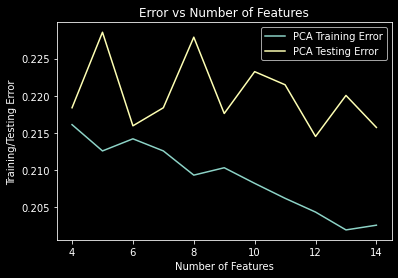

In [40]:
''' plot the Number of features vs pca training error '''
plt.plot(no_of_componenets,pca_training_error,label = 'PCA Training Error')
''' plot the Number of features vs pca testing error '''
plt.plot(no_of_componenets,pca_testing_error,label = 'PCA Testing Error')
plt.legend()
plt.xlabel("Number of Features")
plt.ylabel("Training/Testing Error")
plt.title('Error vs Number of Features')
plt.show()

* From the above plot it can be inferred that for number of features between 6 to 8 or training and testing error both are minimum as compared to other feature points where training error is minimum or testing error is maximum and vice versa.

* In case of 7 features selection both training and testing error are minimized and also matching performance as split size = 7,10 in part 01. 